# K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks

##### Overview
1. Clustering
2. Kmeans Algorithm
3. Implementation
4. Applications
5. Geyser's Eruptions Segmentation
6. Image Compression
7. Evaluation Methods
8. Drawbacks
9. Conclusion

##### 1. Clustering

Phân cụm là một trong những kỹ thuật phân tích khám phá dữ liệu phổ biến nhất được dùng để có cái nhìn trực quan về cấu trúc dữ liệu. Nó có thể được định nghĩa là nhiệm vụ xác định các nhóm con trong dữ liệu, sao cho các điểm dữ liệu trong cùng một nhóm con (cụm) thì rất giống nhau trong khi các điểm dữ liệu các cụm khác nhau thì rất khác nhau.Nói cách khác, chúng tôi cố gắng tìm các nhóm con đồng nhất trong dữ liệu sao cho các điểm dữ liệu trong mỗi cụm giống nhau nhất có thể theo một thước đo tương tự như khoảng cách dựa trên euclide hoặc khoảng cách dựa trên tương quan

Phân tích phân cụm có thể được thực hiện trên cơ sở các tính năng nơi chúng tôi cố gắng tìm các nhóm mẫu phụ dựa trên các tính năng hoặc trên cơ sở các mẫu mà chúng tôi cố gắng tìm các nhóm tính năng dựa trên mẫu. Chúng tôi sẽ bao gồm ở đây phân cụm dựa trên các tính năng. Phân cụm được dùng trong phân khúc thị trường; nơi chúng tôi cố gắng tìm các khách hàng tương tự nhau cho dù về mặt hành vi hoặc thuộc tính, phân đoạn hoặc nén ảnh. nơi chúng tôi cố gắng nhóm các khu vực tương tự lại với nhau, phân nhóm tài liệu dựa trên các chủ đề....

Không giống như học có giám sát, phân cụm được coi là một phương pháp học không giám sát vì chúng ta không có sự thật cơ bản để so sánh đầu ra của thuật toán phân cụm với các nhãn thực để đánh giá hiệu suất của nó. Chúng tôi chỉ muốn cố gắng nghiên cứu cấu trúc của dữ liệu bằng cách nhóm các điểm dữ liệu thành các nhóm nhỏ riêng biệt

#### 2. Kmeans Algorithm




Thuật toán Kmeans là thuật toán lặp cố gắng phân vùng tập dữ liệu thành các nhóm (nhóm) không chồng chéo riêng biệt được xác định trước trong đó mỗi điểm dữ liệu chỉ thuộc về một nhóm. Nó cố gắng làm cho các điểm dữ liệu giữa các cụm càng giống nhau càng tốt trong khi vẫn giữ các cụm càng khác nhau (càng xa) càng tốt. Nó gán các điểm dữ liệu cho một cụm sao cho tổng khoảng cách bình phương giữa các điểm dữ liệu và tâm của cụm (trung bình số học của tất cả các điểm dữ liệu thuộc cụm đó) ở mức tối thiểu. Chúng ta càng có ít biến thể trong các cụm, các điểm dữ liệu càng đồng nhất (tương tự) trong cùng một cụm. 

Thuật toán K-means hoạt động như sau:
1. Xác định rõ số cụm K
2. Khởi tạo centroid bằng cách xáo trộn tập dữ liệu và sau đó chọn ngẫu nhiên các điểm dữ liệu cho centroid mà không cần thay thế.
3. Tiếp tục lặp đi lặp lại cho đến khi không có thay đổi nào đối với tâm. tức là việc gán điểm dữ liệu cho các cụm không thay đổi
    - Tính tổng khoảng cách bình phương giữa các điểm dữ liệu và tất cả các tâm.
    - Gán từng điểm dữ liệu cho cụm gần nhất (centroid).
    - Tính toán trọng tâm cho các cụm bằng cách lấy trung bình của tất cả các điểm dữ liệu thuộc về mỗi cụm.

Cách tiếp cận kmeans sau để giải quyết vấn đề được gọi là Expectation-Maximization: 

#### 3. Implementation

In [3]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

#### 4. Application

In [4]:

# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

c:\program files\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


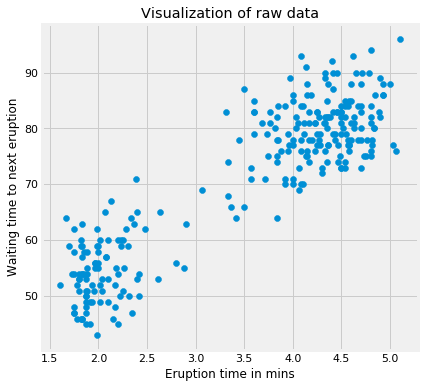

In [5]:

# Import the data
df = pd.read_csv('old_faithful.csv')

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

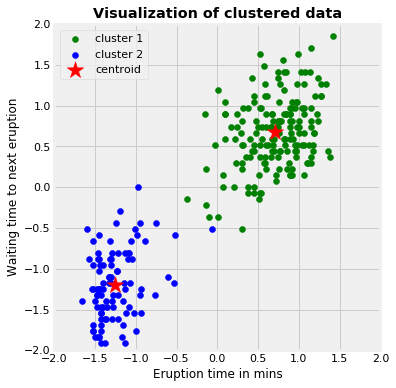

In [7]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = Kmeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.centroids

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

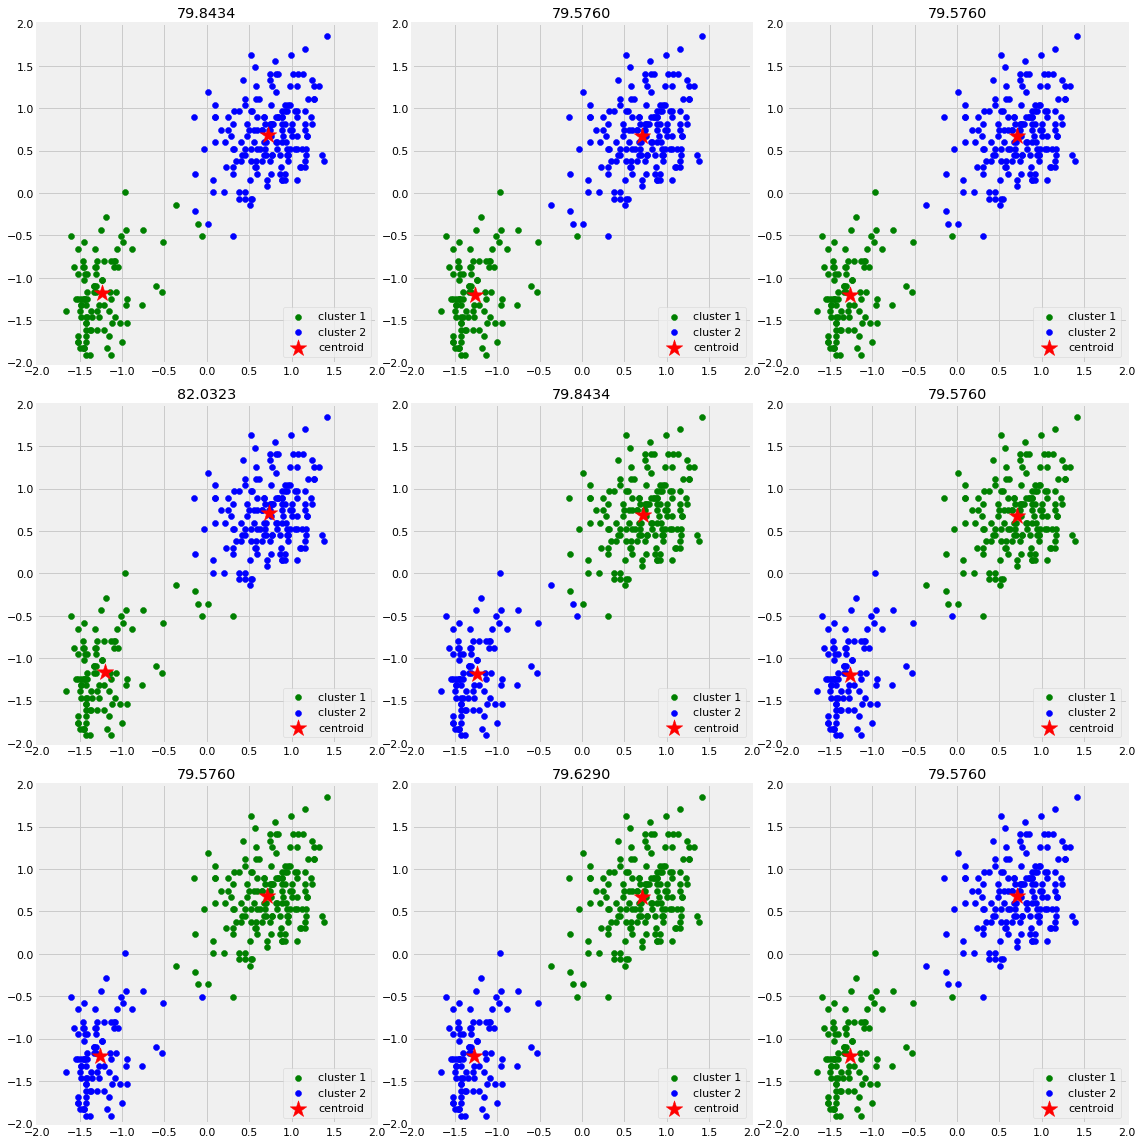

In [8]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = Kmeans(n_clusters=2,
                max_iter=3,
                random_state=np.random.randint(0, 1000, size=1))
    km.fit(X_std)
    centroids = km.centroids
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();

Như biểu đồ trên cho thấy rằng chúng tôi chỉ kết thúc với hai cách phân cụm khác nhau dựa trên các khởi tạo khác nhau. Chúng tôi sẽ chọn một trong những khoảng cách bình phương thấp nhất.

#### 7. Evaluation Methods


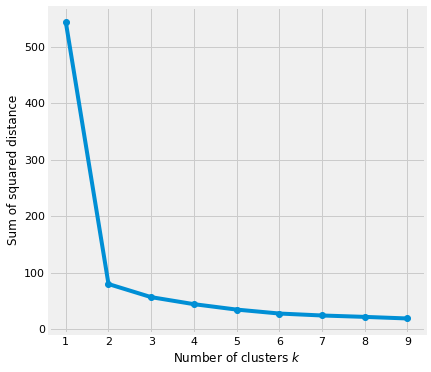

In [9]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters $k$')
plt.ylabel('Sum of squared distance');

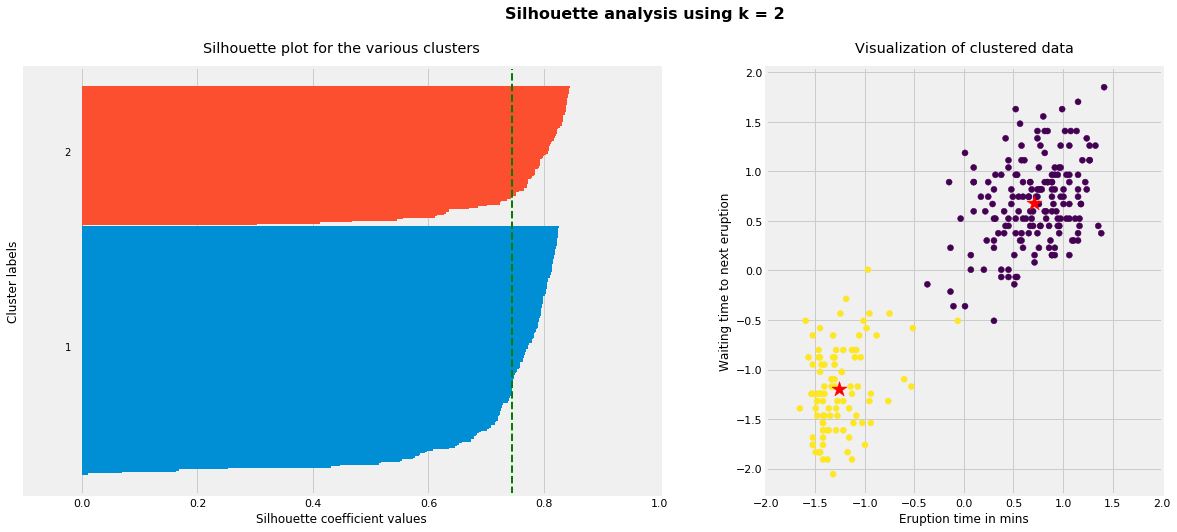

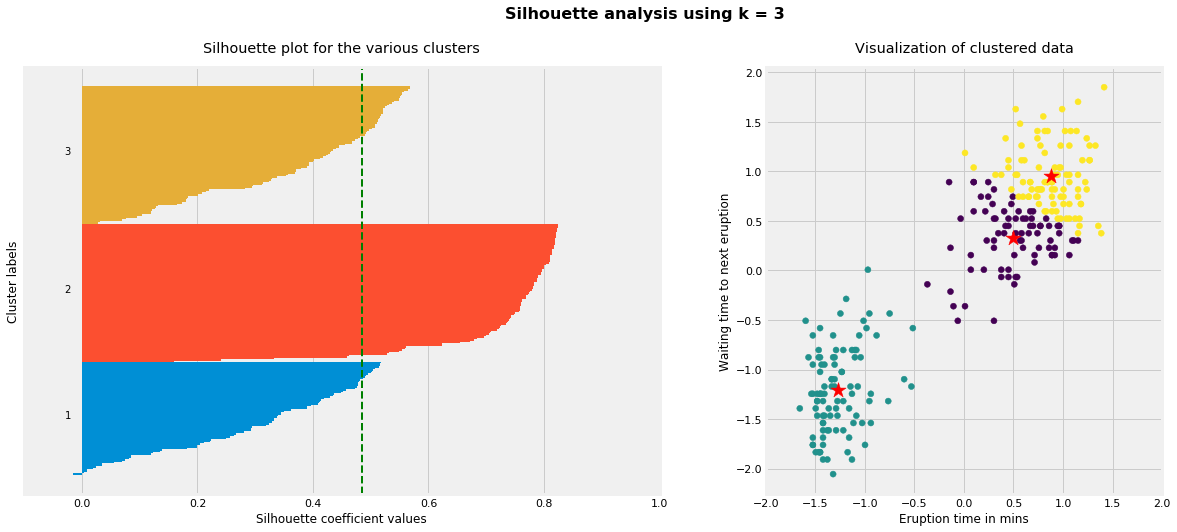

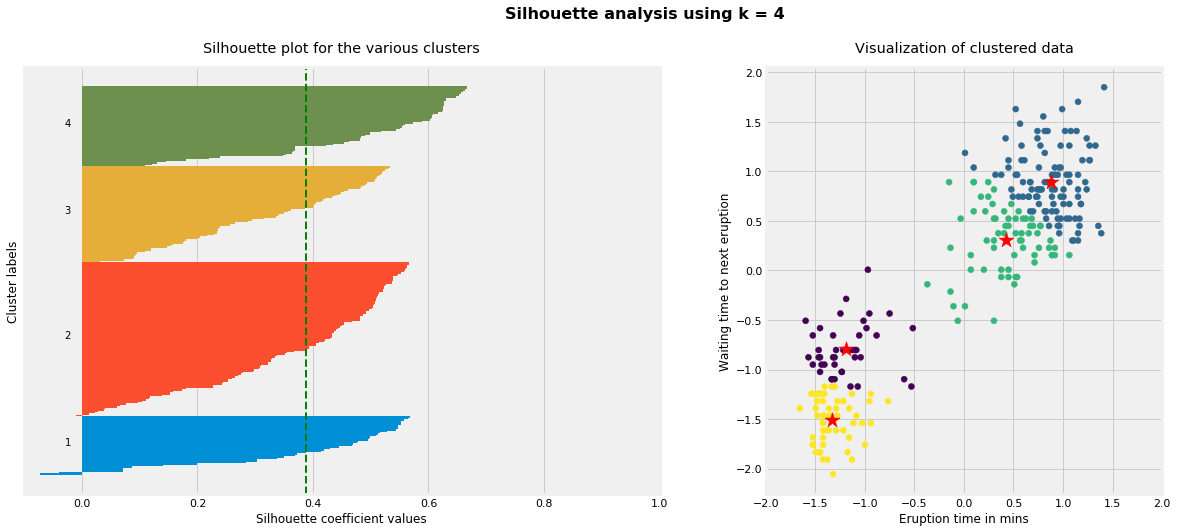

In [10]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

# https://github.com/ImadDabbura/blog-posts/blob/master/notebooks/Kmeans-Clustering.ipynb